# DNN - Cifar 10

# Exercise
Conduct the analysis using DNN model for Cifar dataset. Then, conduct the model tuning to improve the performance.

https://keras.io/api/datasets/cifar10/

In [51]:
from keras.datasets import cifar10

# Load the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [52]:
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
X_test.shape (10000, 32, 32, 3)
y_train.shape (50000, 1)
y_test.shape (10000, 1)


In [53]:
# Keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical # To perform one-hot encoding (Build dummy columns with the easiest way)

# Flattening the images from the 32 * 32 pixels * 3 to 1 Dimensional 3072 pixels
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [54]:
X_train /= 255
X_test /= 255

In [55]:

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print("Shape before one-hot encoding: ", y_train.shape)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [56]:
# Option 1: Use initializers and regularizers

from keras import initializers
from keras import regularizers

# Option 2: Use Dropout with early stopping
from keras.layers import Dropout

# Option 3: Use EarlyStopping
from keras.callbacks import EarlyStopping

In [57]:
# Form NN
# Building a linear stack of layers with the sequential model

L1=100
L2=100
L3=100

model = Sequential()
model.add(Dense(L1, input_dim=3072,activation='relu')) # Original
# model.add(Dense(L1, input_dim=3072,activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01))) # Option 1
model.add(Dense(L2, activation='relu'))
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.2)) # Option 2


# Output layer (Softmax = multi nominal)
model.add(Dense(10, activation='softmax'))

In [58]:
# Compile the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [59]:
 # Training the model for 10 epochs

early_monitoring_monitor = EarlyStopping(patience=3) # Option 3

# history = model.fit(X_train,Y_train,epochs=10,batch_size=100,validation_data=(X_test,Y_test))
history = model.fit(X_train,Y_train,epochs=30,batch_size=100,validation_data=(X_test,Y_test),callbacks=[early_monitoring_monitor]) # Option 3 with increased epochs

Epoch 1/30
500/500 [==============================] - 6s 11ms/step - loss: 1.8942 - accuracy: 0.3089 - val_loss: 1.7171 - val_accuracy: 0.3800
Epoch 2/30
500/500 [==============================] - 6s 12ms/step - loss: 1.7121 - accuracy: 0.3839 - val_loss: 1.6214 - val_accuracy: 0.4211
Epoch 3/30
500/500 [==============================] - 5s 10ms/step - loss: 1.6354 - accuracy: 0.4145 - val_loss: 1.5727 - val_accuracy: 0.4465
Epoch 4/30
500/500 [==============================] - 6s 12ms/step - loss: 1.5926 - accuracy: 0.4318 - val_loss: 1.5921 - val_accuracy: 0.4299
Epoch 5/30
500/500 [==============================] - 5s 10ms/step - loss: 1.5619 - accuracy: 0.4407 - val_loss: 1.5514 - val_accuracy: 0.4448
Epoch 6/30
500/500 [==============================] - 6s 11ms/step - loss: 1.5343 - accuracy: 0.4526 - val_loss: 1.5348 - val_accuracy: 0.4554
Epoch 7/30
500/500 [==============================] - 7s 13ms/step - loss: 1.5132 - accuracy: 0.4567 - val_loss: 1.5173 - val_accuracy: 0.4487

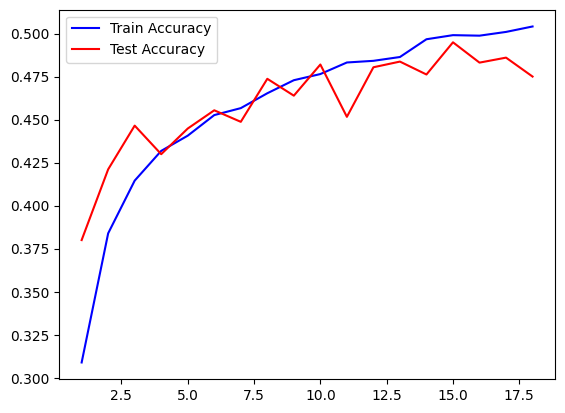

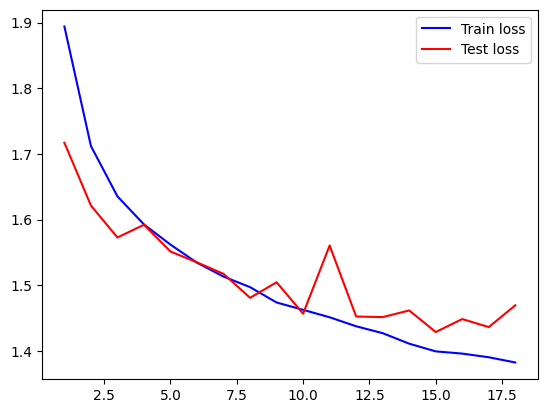

In [60]:
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()

This is happening due to DNN is not good at this kind of data

This dataset contains deep data about RGB.

Should be using CNN for capturing the whole image data.